Optimized Handwriting-based Parkinson's Disease Classification Using Ensemble Modeling and VGG19 Feature Extraction

TARGET SINTA 2

## **Drive to colab**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


# Load Dataset from Kaggle

In [ ]:
from google.colab import files

# Upload your kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install kaggle

import os
import json

# Set Kaggle API credentials
kaggle_json = '/content/kaggle.json'
with open(kaggle_json, 'r') as file:
    kaggle_data = json.load(file)

os.environ['KAGGLE_USERNAME'] = kaggle_data['username']
os.environ['KAGGLE_KEY'] = kaggle_data['key']

In [ ]:
! kaggle datasets download -d banilkumar20phd7071/handwritten-parkinsons-disease-augmented-data

100% 239M/240M [00:04<00:00, 76.0MB/s]
100% 240M/240M [00:04<00:00, 51.0MB/s]


In [ ]:
!unzip /content/handwritten-parkinsons-disease-augmented-data.zip

Archive:  /content/handwritten-parkinsons-disease-augmented-data.zip
  inflating: Dataset/Healthy/Healthy1.png  
  inflating: Dataset/Healthy/Healthy10.png  
  inflating: Dataset/Healthy/Healthy100.png  
  inflating: Dataset/Healthy/Healthy1000.png  
  inflating: Dataset/Healthy/Healthy1001.png  
  inflating: Dataset/Healthy/Healthy1002.png  
  inflating: Dataset/Healthy/Healthy1003.png  
  inflating: Dataset/Healthy/Healthy1004.png  
  inflating: Dataset/Healthy/Healthy1005.png  
  inflating: Dataset/Healthy/Healthy1006.png  
  inflating: Dataset/Healthy/Healthy1007.png  
  inflating: Dataset/Healthy/Healthy1008.png  
  inflating: Dataset/Healthy/Healthy1009.png  
  inflating: Dataset/Healthy/Healthy101.png  
  inflating: Dataset/Healthy/Healthy1010.png  
  inflating: Dataset/Healthy/Healthy1011.png  
  inflating: Dataset/Healthy/Healthy1012.png  
  inflating: Dataset/Healthy/Healthy1013.png  
  inflating: Dataset/Healthy/Healthy1014.png  
  inflating: Dataset/Healthy/Healthy1015.png 

## **Import Library**

In [ ]:
import numpy as np
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator



## **Load Dataset**

In [ ]:
import os
path = "/content/Dataset"
dir_list = [os.path.join(path,i) for i in os.listdir(path)]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict


{'Healthy': 1632, 'Parkinson': 1632}

In [ ]:
from pathlib import Path

path = Path('/content/Dataset')
imageCount = len(list(path.glob('*/*.png')))
print(imageCount)

3264


Failed to read image: /content/Dataset/Parkinson/Parkinson350.png
Failed to read image: /content/Dataset/Healthy/Healthy581.png
Failed to read image: /content/Dataset/Parkinson/Parkinson253.png
Failed to read image: /content/Dataset/Healthy/Healthy337.png
Failed to read image: /content/Dataset/Healthy/Healthy965.png


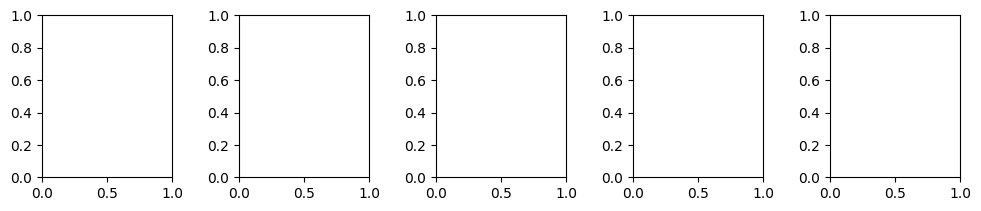

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from pathlib import Path

def display_random_images_from_dataset(dataset_path, num_images=5):
    # Mendapatkan daftar nama kelas
    class_names = os.listdir(dataset_path)

    # Membuat grid 5x5 untuk menampilkan beberapa gambar
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        random_class = random.choice(class_names)
        class_path = os.path.join(dataset_path, random_class)
        image_files = [file for file in os.listdir(class_path) if file.endswith(('.jpg', '.png', '.jpeg'))]

        # Memastikan ada file gambar yang valid dalam direktori
        if len(image_files) == 0:
            continue

        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)

        try:
            image = plt.imread(image_path)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
        except:
            print(f"Failed to read image: {image_path}")

    plt.tight_layout()
    plt.show()

# Ganti dataset_path dengan jalur ke folder dataset Anda
dataset_path = '/content/Dataset'
display_random_images_from_dataset(dataset_path, num_images=5)


# Get Insight

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data and preprocessing parameters
data_dir = '/content/Dataset'
image_size = (224, 224)
batch_size = 32
validation_split = 0.2

## PRE-PROCESSING

In [ ]:
# Preprocessing data dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    subset='validation'
)

Found 2612 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


ValueError: ignored

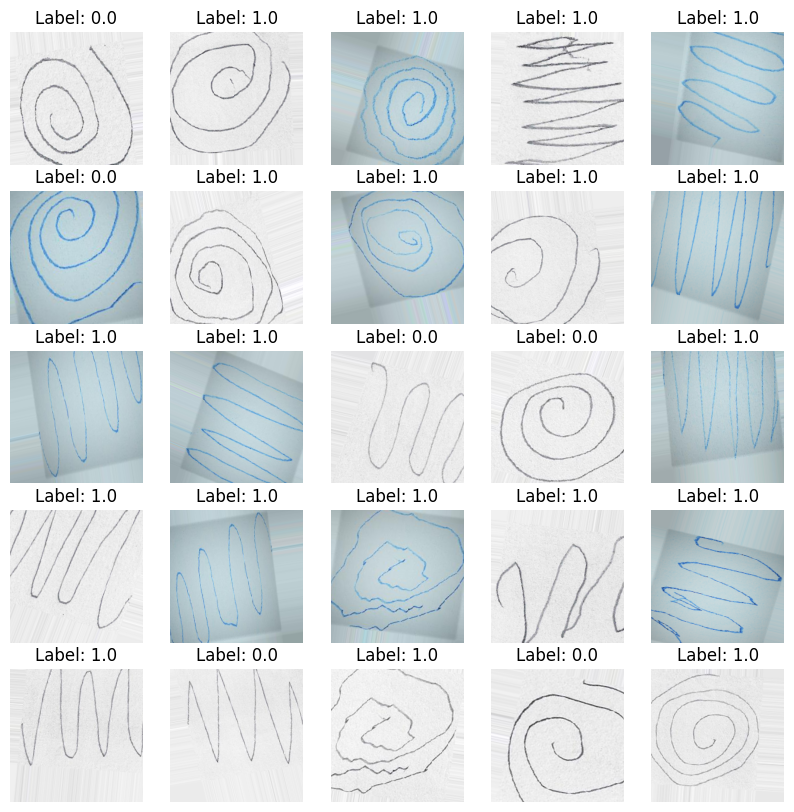

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Memperoleh satu batch data dari generator
batch = next(train_gen)

# Memperoleh gambar dan label dari batch
images, labels = batch

# Menampilkan gambar hasil preprocessing dari satu batch
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title('Label: {}'.format(labels[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()


## **Ekstrasi fitur**

In [ ]:
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# 1. Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [ ]:
#classes
num_classes = 2


In [ ]:
# 2. Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Binary classification, so 1 neuron with sigmoid activation


In [ ]:
# Load an example image
img_path = '/content/Dataset/Parkinson/Parkinson1009.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the model
predictions = model.predict(x)

# Decode the predictions (for imagenet classes)
decoded_predictions = decode_predictions(predictions)

# Show the image with its predicted labels (for imagenet classes)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
!pip install tensorflow
import tensorflow as tf


1/1 [==============================] - 9s 9s/step


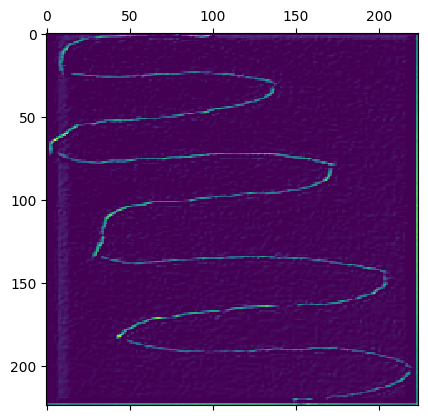

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Choose the layer you want to visualize. For example, 'block1_conv1':
layer_name = 'block1_conv1'

# Load and preprocess the image
img_path = '/content/Dataset/Parkinson/Parkinson1006.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get the output from the selected layer
layer_output = base_model.get_layer(layer_name).output

# Create a model that takes an image as input and outputs the selected layer's output
vis_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_output)

# Get the activations of the selected layer for the input image
vis_output = vis_model.predict(x)

# Visualize the activations of the first filter in the selected layer
filter_index = 0  # Replace with the index of the filter you want to visualize
plt.matshow(vis_output[0, :, :, filter_index], cmap='viridis')
plt.show()



1/1 [==============================] - 0s 173ms/step


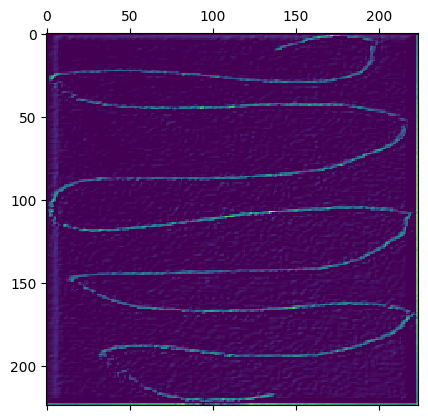

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Choose the layer you want to visualize. For example, 'block1_conv1':
layer_name = 'block1_conv1'

# Load and preprocess the image
img_path = '/content/Dataset/Healthy/Healthy1006.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get the output from the selected layer
layer_output = base_model.get_layer(layer_name).output

# Create a model that takes an image as input and outputs the selected layer's output
vis_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_output)

# Get the activations of the selected layer for the input image
vis_output = vis_model.predict(x)

# Visualize the activations of the first filter in the selected layer
filter_index = 0  # Replace with the index of the filter you want to visualize
plt.matshow(vis_output[0, :, :, filter_index], cmap='viridis')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load and preprocess the image
img_path = '/content/Dataset/Parkinson/Parkinson1006.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Create a list to store the activations of all layers
all_activations = []

# Iterate through all layers in the model
for layer in base_model.layers:
    # Create a sub-model that includes only the layers up to the current layer
    sub_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer.output)
    # Get the activations of the current layer for the input image
    layer_activation = sub_model.predict(x)
    # Append the activations to the list
    all_activations.append(layer_activation)

# Visualize the activations of all layers
layer_names = [layer.name for layer in base_model.layers]

for layer_name, layer_activation in zip(layer_names, all_activations):
    # Check if the layer activation has more than one dimension
    if len(layer_activation.shape) > 3:
        # Visualize all filters in the layer
        num_filters = layer_activation.shape[-1]
        rows = np.floor(np.sqrt(num_filters)).astype(int)
        cols = np.ceil(num_filters / rows).astype(int)
        fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
        axs = axs.ravel()
        for i in range(num_filters):
            axs[i].imshow(layer_activation[0, :, :, i], cmap='viridis')
            axs[i].axis('off')
        fig.suptitle(layer_name, fontsize=16)
        plt.show()
    else:
        # Visualize the activations for single-dimensional layers (e.g., GlobalAveragePooling2D)
        plt.plot(layer_activation[0])
        plt.title(layer_name)
        plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load and preprocess the image
img_path = '/content/Dataset/Parkinson/Parkinson1006.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Create a model that takes an image as input and outputs the activations of all layers
layer_outputs = [layer.output for layer in base_model.layers]
vis_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_outputs)

# Get the activations of all layers for the input image
all_activations = vis_model.predict(x)

# Visualize the activations of all layers in one combined image
rows = 8
cols = 8
fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
axs = axs.ravel()

valid_activations = [activation for activation in all_activations if not np.any(np.isnan(activation))]

for i in range(min(rows * cols, len(valid_activations))):
    axs[i].imshow(valid_activations[i][0, :, :, 0], cmap='viridis')
    axs[i].axis('off')
    layer_name = base_model.layers[i].name
    axs[i].set_title(layer_name)

plt.tight_layout()
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load and preprocess the image
img_path = '/content/Dataset/Parkinson/Parkinson1006.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Create a model that takes an image as input and outputs the activations of all layers
layer_outputs = [layer.output for layer in base_model.layers]
vis_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer_outputs)

# Get the activations of all layers for the input image
all_activations = vis_model.predict(x)

# Visualize the activations of all layers in one combined image
rows = 8  # You can adjust the number of rows and columns to fit the activations
cols = 8
fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
axs = axs.ravel()
for i in range(rows * cols):
    axs[i].imshow(all_activations[i][0, :, :, 0], cmap='viridis')
    axs[i].axis('off')
    layer_name = base_model.layers[i].name
    axs[i].set_title(layer_name)
plt.tight_layout()
plt.show()


In [ ]:
# Combine the base model with the custom layers
model = Model(inputs=base_model.input, outputs=output_layer)

# Display the summary of the model
model.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

## **FINE TUNING**

In [ ]:
# 3. Create the final model for fine-tuning
model = Model(inputs=base_model.input, outputs=output_layer)


In [ ]:
# 4. Freeze the layers of VGG19 for fine-tuning
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# 5. Compile the model for fine-tuning
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Display the summary of the model
model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

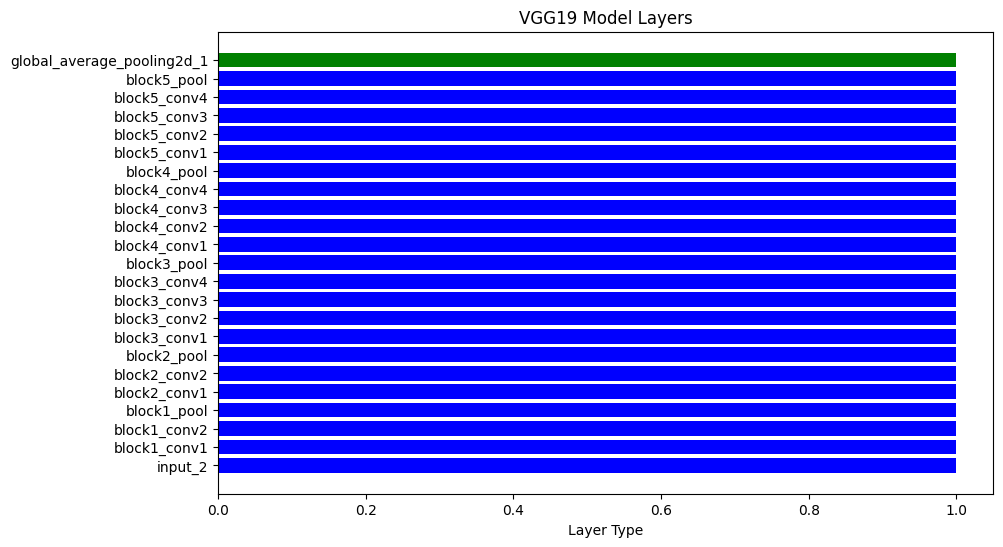

In [ ]:
from keras.applications import VGG19
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt

# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a GlobalAveragePooling2D layer (your modification)
x = GlobalAveragePooling2D()(base_model.output)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Visualize the layers
layer_names = [layer.name for layer in model.layers]

# Plot the layer names and their types (custom or original)
layer_types = ['Modification' if 'global_average_pooling2d' in layer_name else 'Original' for layer_name in layer_names]

# Create a bar plot to visualize the layers
plt.figure(figsize=(10, 6))
plt.barh(layer_names, [1] * len(layer_names), color=['green' if layer_type == 'Modification' else 'blue' for layer_type in layer_types])
plt.xlabel('Layer Type')
plt.title('VGG19 Model Layers')
plt.show()


## **TRAIN MODEL**

In [ ]:
# 6. Train the model using the extracted features
model.fit(train_gen, validation_data=val_gen, epochs=10)


Epoch 1/10
82/82 [==============================] - 61s 628ms/step - loss: 0.5614 - accuracy: 0.7094 - val_loss: 0.4357 - val_accuracy: 0.7991
Epoch 2/10
82/82 [==============================] - 51s 622ms/step - loss: 0.4945 - accuracy: 0.7565 - val_loss: 0.4238 - val_accuracy: 0.8113
Epoch 3/10
82/82 [==============================] - 49s 598ms/step - loss: 0.4635 - accuracy: 0.7818 - val_loss: 0.4079 - val_accuracy: 0.8206
Epoch 4/10
82/82 [==============================] - 57s 695ms/step - loss: 0.4315 - accuracy: 0.8093 - val_loss: 0.4133 - val_accuracy: 0.8083
Epoch 5/10
82/82 [==============================] - 48s 590ms/step - loss: 0.4286 - accuracy: 0.7975 - val_loss: 0.4038 - val_accuracy: 0.8129
Epoch 6/10
82/82 [==============================] - 49s 602ms/step - loss: 0.4316 - accuracy: 0.7975 - val_loss: 0.3936 - val_accuracy: 0.8267
Epoch 7/10
82/82 [==============================] - 59s 723ms/step - loss: 0.4271 - accuracy: 0.8059 - val_loss: 0.3878 - val_accuracy: 0.8267

In [ ]:
# 7. Extract features from the validation set
x_val_features_fine_tune = base_model.predict(val_gen)

21/21 [==============================] - 9s 420ms/step


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# Reshape the features for all models
x_val_features_fine_tune_reshaped = x_val_features_fine_tune.reshape(x_val_features_fine_tune.shape[0], -1)

# 8. Initialize and fine-tune SVM model
svm_model = SVC(kernel='rbf', C=1.0, probability=True)
svm_model.fit(x_val_features_fine_tune_reshaped, val_gen.classes)
svm_predictions = svm_model.predict(x_val_features_fine_tune_reshaped)
svm_report = classification_report(val_gen.classes, svm_predictions)
print("SVM Model Classification Report:\n", svm_report)

# 9. Initialize and fine-tune KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_val_features_fine_tune_reshaped, val_gen.classes)
knn_predictions = knn_model.predict(x_val_features_fine_tune_reshaped)
knn_report = classification_report(val_gen.classes, knn_predictions)
print("KNN Model Classification Report:\n", knn_report)

# 9. Initialize and fine-tune Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_val_features_fine_tune_reshaped, val_gen.classes)
nb_predictions = nb_model.predict(x_val_features_fine_tune_reshaped)
nb_report = classification_report(val_gen.classes, nb_predictions)
print("Naive Bayes Model Classification Report:\n", nb_report)

# 10. Initialize and fine-tune XGBoost model
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(x_val_features_fine_tune_reshaped, val_gen.classes)
xgb_predictions = xgb_model.predict(x_val_features_fine_tune_reshaped)
xgb_report = classification_report(val_gen.classes, xgb_predictions)
print("XGBoost Model Classification Report:\n", xgb_report)

# 11. Initialize and fine-tune Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model.fit(x_val_features_fine_tune_reshaped, val_gen.classes)
rf_predictions = rf_model.predict(x_val_features_fine_tune_reshaped)
rf_report = classification_report(val_gen.classes, rf_predictions)
print("Random Forest Model Classification Report:\n", rf_report)

# 12. Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model),
    ('nb', nb_model),
    ('xgb', xgb_model),
    ('rf', rf_model)
], voting='soft')

# 13. Fit the ensemble model
ensemble_model.fit(x_val_features_fine_tune_reshaped, val_gen.classes)

# 14. Evaluate the ensemble model
ensemble_predictions = ensemble_model.predict(x_val_features_fine_tune_reshaped)
ensemble_report = classification_report(val_gen.classes, ensemble_predictions)
print("Ensemble Model Classification Report:\n", ensemble_report)


SVM Model Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       326
           1       0.93      0.72      0.81       326

    accuracy                           0.83       652
   macro avg       0.85      0.83      0.83       652
weighted avg       0.85      0.83      0.83       652

KNN Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       326
           1       0.95      0.75      0.84       326

    accuracy                           0.85       652
   macro avg       0.87      0.85      0.85       652
weighted avg       0.87      0.85      0.85       652

Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       326
           1       1.00      0.95      0.97       326

    accuracy                           0.97       652
   macro avg      

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1-score for SVM model
svm_precision = precision_score(val_gen.classes, svm_predictions, average='weighted')
svm_recall = recall_score(val_gen.classes, svm_predictions, average='weighted')
svm_f1 = f1_score(val_gen.classes, svm_predictions, average='weighted')

print("SVM Model Precision:", svm_precision)
print("SVM Model Recall:", svm_recall)
print("SVM Model F1-score:", svm_f1)

# Precision, Recall, and F1-score for KNN model
knn_precision = precision_score(val_gen.classes, knn_predictions, average='weighted')
knn_recall = recall_score(val_gen.classes, knn_predictions, average='weighted')
knn_f1 = f1_score(val_gen.classes, knn_predictions, average='weighted')

print("KNN Model Precision:", knn_precision)
print("KNN Model Recall:", knn_recall)
print("KNN Model F1-score:", knn_f1)

# Precision, Recall, and F1-score for Naive Bayes model
nb_precision = precision_score(val_gen.classes, nb_predictions, average='weighted')
nb_recall = recall_score(val_gen.classes, nb_predictions, average='weighted')
nb_f1 = f1_score(val_gen.classes, nb_predictions, average='weighted')

print("Naive Bayes Model Precision:", nb_precision)
print("Naive Bayes Model Recall:", nb_recall)
print("Naive Bayes Model F1-score:", nb_f1)

# Precision, Recall, and F1-score for XGBoost model
xgb_precision = precision_score(val_gen.classes, xgb_predictions, average='weighted')
xgb_recall = recall_score(val_gen.classes, xgb_predictions, average='weighted')
xgb_f1 = f1_score(val_gen.classes, xgb_predictions, average='weighted')

print("XGBoost Model Precision:", xgb_precision)
print("XGBoost Model Recall:", xgb_recall)
print("XGBoost Model F1-score:", xgb_f1)

# Precision, Recall, and F1-score for Random Forest model
rf_precision = precision_score(val_gen.classes, rf_predictions, average='weighted')
rf_recall = recall_score(val_gen.classes, rf_predictions, average='weighted')
rf_f1 = f1_score(val_gen.classes, rf_predictions, average='weighted')

print("Random Forest Model Precision:", rf_precision)
print("Random Forest Model Recall:", rf_recall)
print("Random Forest Model F1-score:", rf_f1)

# Precision, Recall, and F1-score for Ensemble model
ensemble_precision = precision_score(val_gen.classes, ensemble_predictions, average='weighted')
ensemble_recall = recall_score(val_gen.classes, ensemble_predictions, average='weighted')
ensemble_f1 = f1_score(val_gen.classes, ensemble_predictions, average='weighted')

print("Ensemble Model Precision:", ensemble_precision)
print("Ensemble Model Recall:", ensemble_recall)
print("Ensemble Model F1-score:", ensemble_f1)


SVM Model Precision: 0.8503917897510573
SVM Model Recall: 0.8328220858895705
SVM Model F1-score: 0.8306997796438567
KNN Model Precision: 0.8698113952020202
KNN Model Recall: 0.852760736196319
KNN Model F1-score: 0.8510437787360424
Naive Bayes Model Precision: 0.973533295604603
Naive Bayes Model Recall: 0.9723926380368099
Naive Bayes Model F1-score: 0.9723760027115582
XGBoost Model Precision: 1.0
XGBoost Model Recall: 1.0
XGBoost Model F1-score: 1.0
Random Forest Model Precision: 1.0
Random Forest Model Recall: 1.0
Random Forest Model F1-score: 1.0
Ensemble Model Precision: 0.9834973397994258
Ensemble Model Recall: 0.9831288343558282
Ensemble Model F1-score: 0.9831256190841438


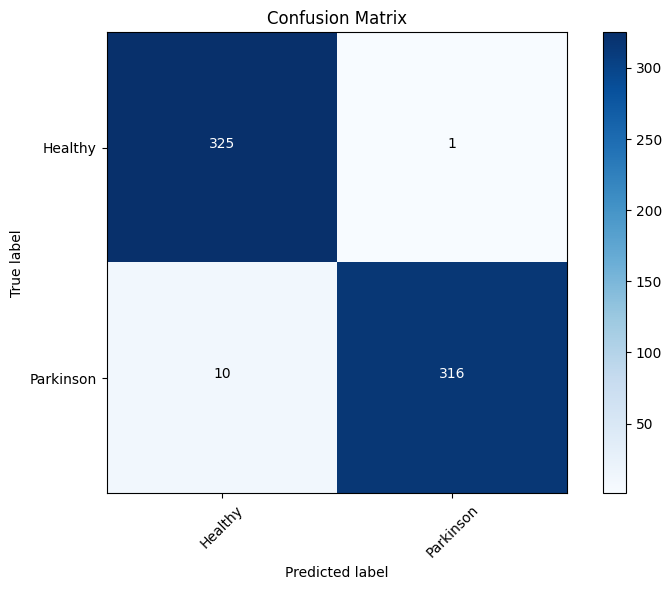

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Evaluate the ensemble model
ensemble_predictions = ensemble_model.predict(x_val_features_fine_tune_reshaped)

# Create the confusion matrix
confusion_matrix_val = confusion_matrix(val_gen.classes, ensemble_predictions)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix_val, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_gen.class_indices))
plt.xticks(tick_marks, val_gen.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, val_gen.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Annotate the heatmap with the counts in each cell
for i in range(len(val_gen.class_indices)):
    for j in range(len(val_gen.class_indices)):
        plt.text(j, i, confusion_matrix_val[i, j],
                 horizontalalignment="center", color="white" if i == j else "black")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the ensemble model
confusion_mat_ensemble = confusion_matrix(val_gen.classes, ensemble_predictions)

# Define the class labels
class_labels = ['Healthy', 'Parkinson']  # Sesuaikan dengan jumlah kelas Anda

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat_ensemble,
                            index=class_labels,
                            columns=class_labels)

# Display the confusion matrix as a table
print("Confusion Matrix for Ensemble Model:")
print(confusion_df)



Confusion Matrix for Ensemble Model:
           Healthy  Parkinson
Healthy        325          1
Parkinson       10        316


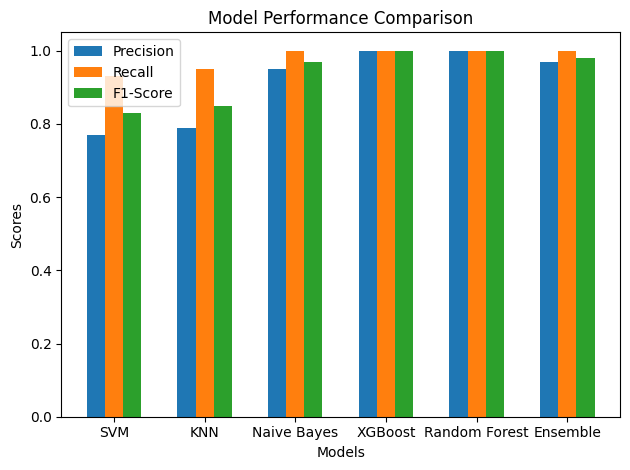

In [ ]:
import matplotlib.pyplot as plt

# Classification reports for individual models and the ensemble
models = ["SVM", "KNN", "Naive Bayes", "XGBoost", "Random Forest", "Ensemble"]
reports = [svm_report, knn_report, nb_report, xgb_report, rf_report, ensemble_report]

# Extract precision, recall, and f1-score from the reports
precision = [float(report.split()[5]) for report in reports]
recall = [float(report.split()[10]) for report in reports]
f1_score = [float(report.split()[15]) for report in reports]

# Number of models
num_models = len(models)

# Bar width
width = 0.2

# X-axis values for the bars
x = range(num_models)

# Create subplots for precision, recall, and f1-score
fig, ax = plt.subplots()
ax.bar(x, precision, width, label='Precision')
ax.bar([i + width for i in x], recall, width, label='Recall')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-Score')

# Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(models)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


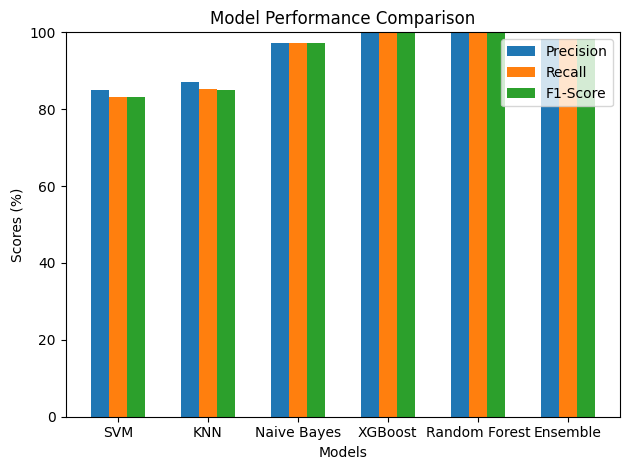

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Precision, Recall, and F1-score for individual models and ensemble (in percentage)
precision_scores = [85.04, 86.98, 97.35, 100.0, 100.0, 98.35]
recall_scores = [83.28, 85.28, 97.24, 100.0, 100.0, 98.31]
f1_scores = [83.07, 85.10, 97.24, 100.0, 100.0, 98.31]

# Model names
models = ["SVM", "KNN", "Naive Bayes", "XGBoost", "Random Forest", "Ensemble"]

# Number of models
num_models = len(models)

# Bar width
width = 0.2

# X-axis values for the bars
x = np.arange(num_models)

# Create subplots for precision, recall, and F1-score
fig, ax = plt.subplots()

# Set the positions for precision, recall, and F1-score bars
precision_bars = ax.bar(x - width, precision_scores, width, label='Precision')
recall_bars = ax.bar(x, recall_scores, width, label='Recall')
f1_bars = ax.bar(x + width, f1_scores, width, label='F1-Score')

# Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Set the y-axis limit to 0-100%
ax.set_ylim(0, 100)

# Display the chart
plt.tight_layout()
plt.show()



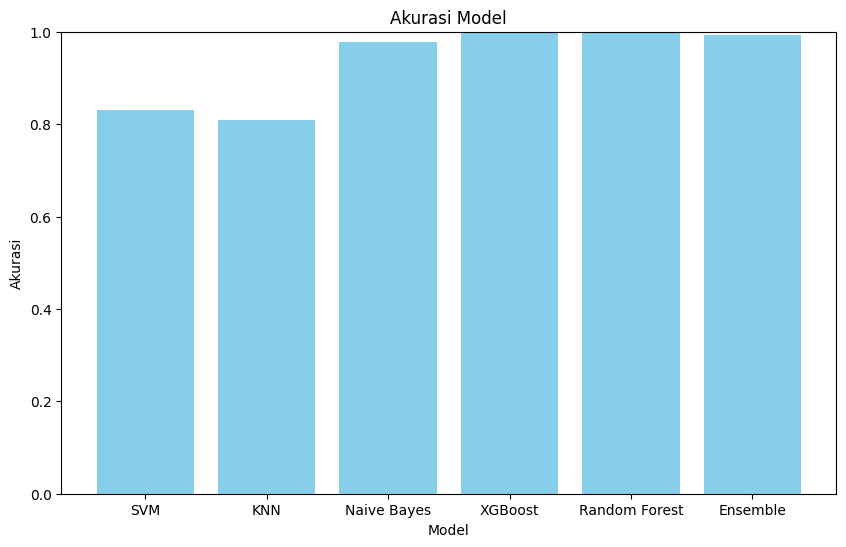

In [ ]:
import matplotlib.pyplot as plt

# Simpan akurasi dari setiap model
model_names = ['SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'Random Forest', 'Ensemble']
accuracy_scores = [svm_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   knn_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   nb_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   xgb_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   rf_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   ensemble_model.score(x_val_features_fine_tune_reshaped, val_gen.classes)]

# Buat grafik batang untuk menampilkan akurasi
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1.0)  # Rentang akurasi dari 0 hingga 1
plt.show()


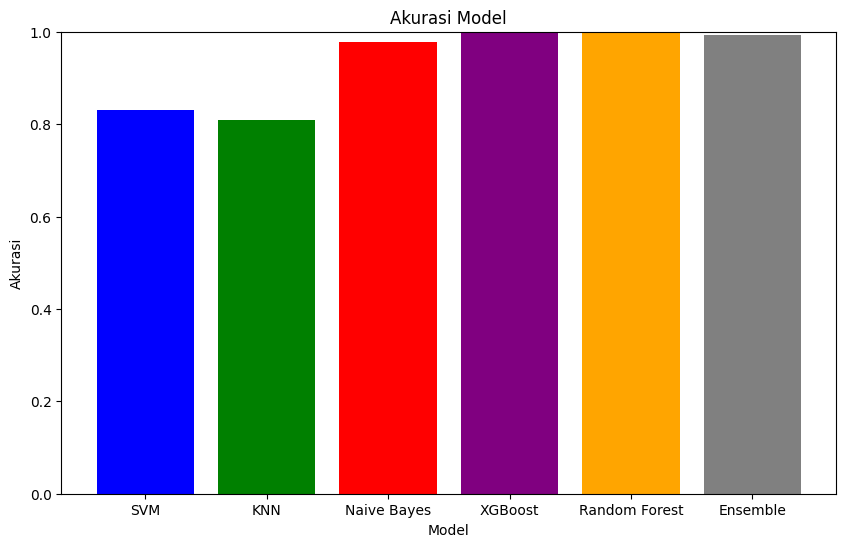

In [ ]:
import matplotlib.pyplot as plt

# Simpan akurasi dari setiap model
model_names = ['SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'Random Forest', 'Ensemble']
accuracy_scores = [svm_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   knn_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   nb_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   xgb_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   rf_model.score(x_val_features_fine_tune_reshaped, val_gen.classes),
                   ensemble_model.score(x_val_features_fine_tune_reshaped, val_gen.classes)]

# Warna yang berbeda untuk setiap model
colors = ['blue', 'green', 'red', 'purple', 'orange', 'gray']

# Buat grafik batang dengan warna yang berbeda
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.title('Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1.0)  # Rentang akurasi dari 0 hingga 1

plt.show()



## **VISUALISASI RESULT**

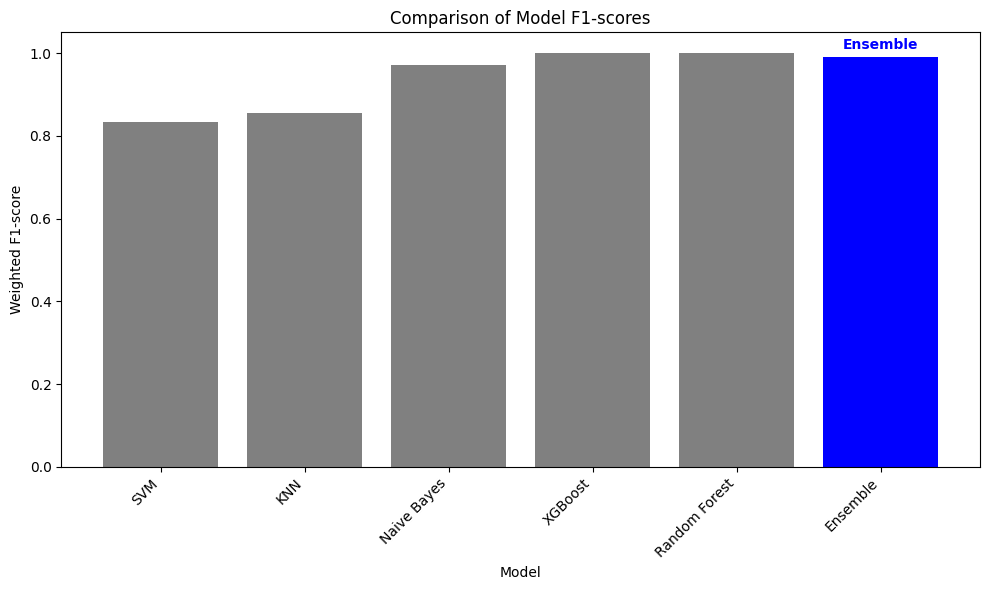

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


# Calculate F1-scores for each model
f1_scores = {
    "SVM": f1_score(val_gen.classes, svm_predictions, average='weighted'),
    "KNN": f1_score(val_gen.classes, knn_predictions, average='weighted'),
    "Naive Bayes": f1_score(val_gen.classes, nb_predictions, average='weighted'),
    "XGBoost": f1_score(val_gen.classes, xgb_predictions, average='weighted'),
    "Random Forest": f1_score(val_gen.classes, rf_predictions, average='weighted'),
    "Ensemble": f1_score(val_gen.classes, ensemble_predictions, average='weighted')
}

# Create a bar chart
models = list(f1_scores.keys())
scores = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue' if model == 'Ensemble' else 'gray' for model in models])
plt.xlabel('Model')
plt.ylabel('Weighted F1-score')
plt.title('Comparison of Model F1-scores')
plt.xticks(rotation=45, ha='right')

# Highlight the ensemble model
for i, model in enumerate(models):
    if model == 'Ensemble':
        plt.text(i, scores[i] + 0.02, model, ha='center', fontweight='bold', color='blue')

plt.tight_layout()
plt.show()


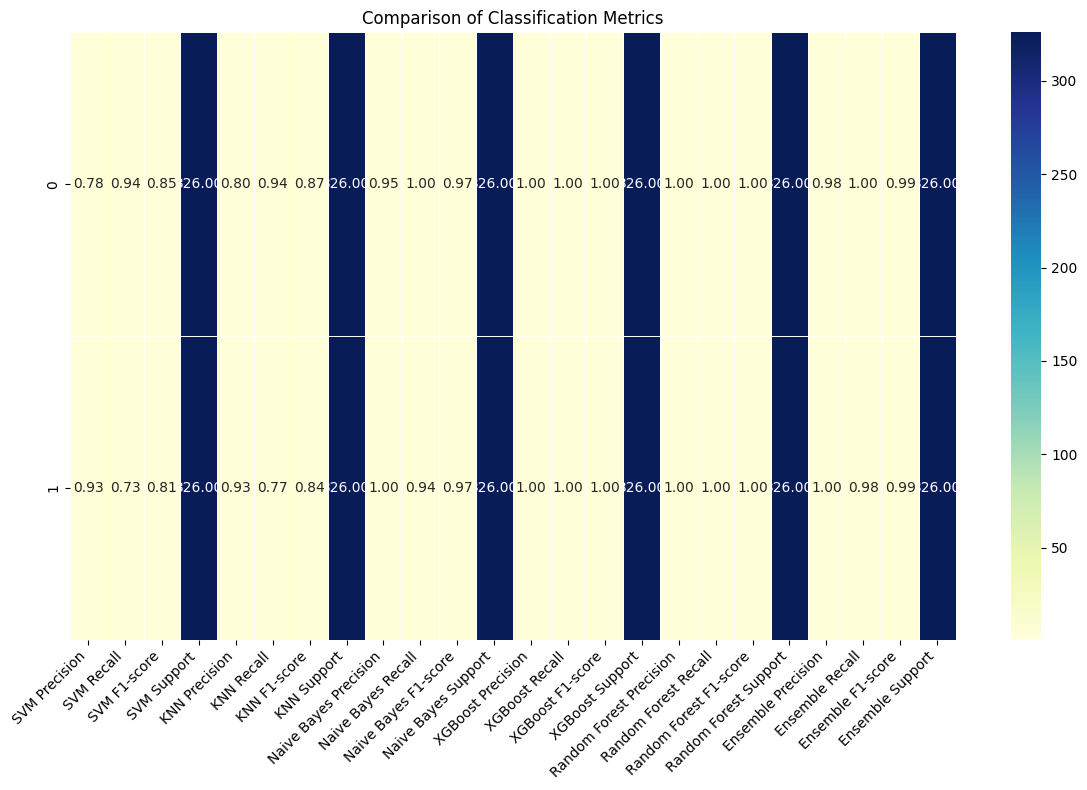

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Calculate classification reports for each model
reports = {
    "SVM": classification_report(val_gen.classes, svm_predictions, output_dict=True),
    "KNN": classification_report(val_gen.classes, knn_predictions, output_dict=True),
    "Naive Bayes": classification_report(val_gen.classes, nb_predictions, output_dict=True),
    "XGBoost": classification_report(val_gen.classes, xgb_predictions, output_dict=True),
    "Random Forest": classification_report(val_gen.classes, rf_predictions, output_dict=True),
    "Ensemble": classification_report(val_gen.classes, ensemble_predictions, output_dict=True)
}

# Define class names
class_names = list(reports['Ensemble'].keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(index=class_names)

# Populate the DataFrame with metric values
for model, report in reports.items():
    for class_name in class_names:
        metrics_df.loc[class_name, f"{model} Precision"] = report[class_name]['precision']
        metrics_df.loc[class_name, f"{model} Recall"] = report[class_name]['recall']
        metrics_df.loc[class_name, f"{model} F1-score"] = report[class_name]['f1-score']
        metrics_df.loc[class_name, f"{model} Support"] = report[class_name]['support']

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Comparison of Classification Metrics")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


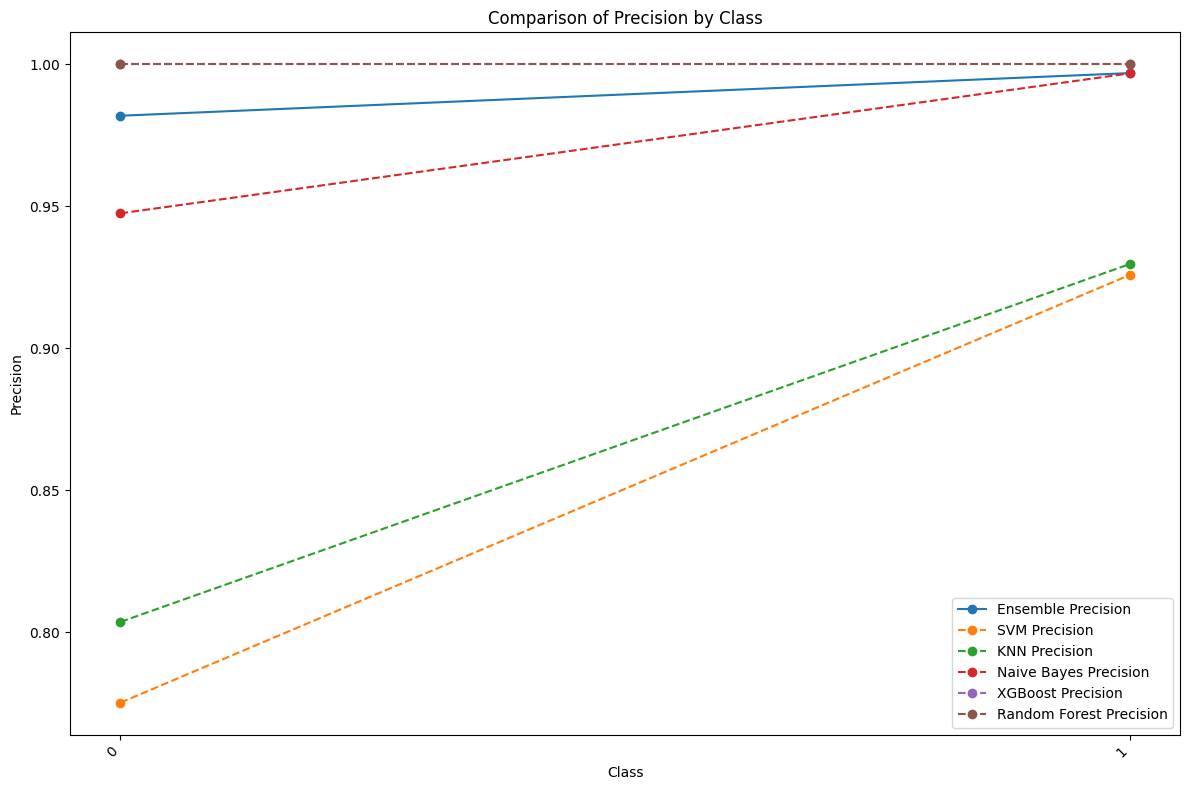

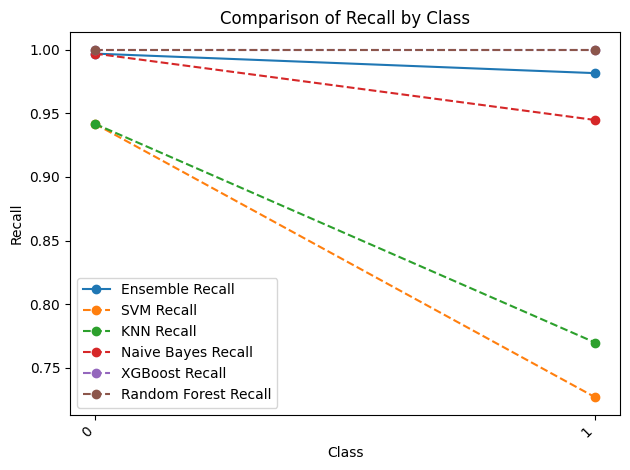

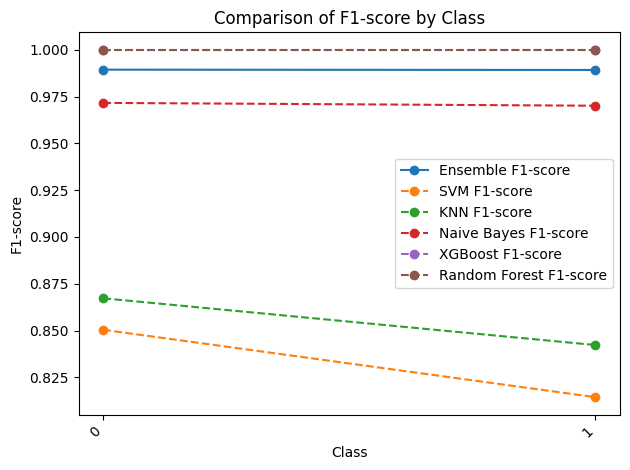

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report


# Calculate classification reports for each model
reports = {
    "SVM": classification_report(val_gen.classes, svm_predictions, output_dict=True),
    "KNN": classification_report(val_gen.classes, knn_predictions, output_dict=True),
    "Naive Bayes": classification_report(val_gen.classes, nb_predictions, output_dict=True),
    "XGBoost": classification_report(val_gen.classes, xgb_predictions, output_dict=True),
    "Random Forest": classification_report(val_gen.classes, rf_predictions, output_dict=True),
    "Ensemble": classification_report(val_gen.classes, ensemble_predictions, output_dict=True)
}

# Define class names
class_names = list(reports['Ensemble'].keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(index=class_names)

# Populate the DataFrame with metric values
for model, report in reports.items():
    for class_name in class_names:
        metrics_df.loc[class_name, f"{model} Precision"] = report[class_name]['precision']
        metrics_df.loc[class_name, f"{model} Recall"] = report[class_name]['recall']
        metrics_df.loc[class_name, f"{model} F1-score"] = report[class_name]['f1-score']

# Create line plots for each metric
plt.figure(figsize=(12, 8))

for metric in ['Precision', 'Recall', 'F1-score']:
    plt.plot(metrics_df.index, metrics_df[f"Ensemble {metric}"], marker='o', label=f"Ensemble {metric}")

    for model in reports.keys():
        if model != "Ensemble":
            plt.plot(metrics_df.index, metrics_df[f"{model} {metric}"], marker='o', linestyle='--', label=f"{model} {metric}")

    plt.title(f"Comparison of {metric} by Class")
    plt.xlabel("Class")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()


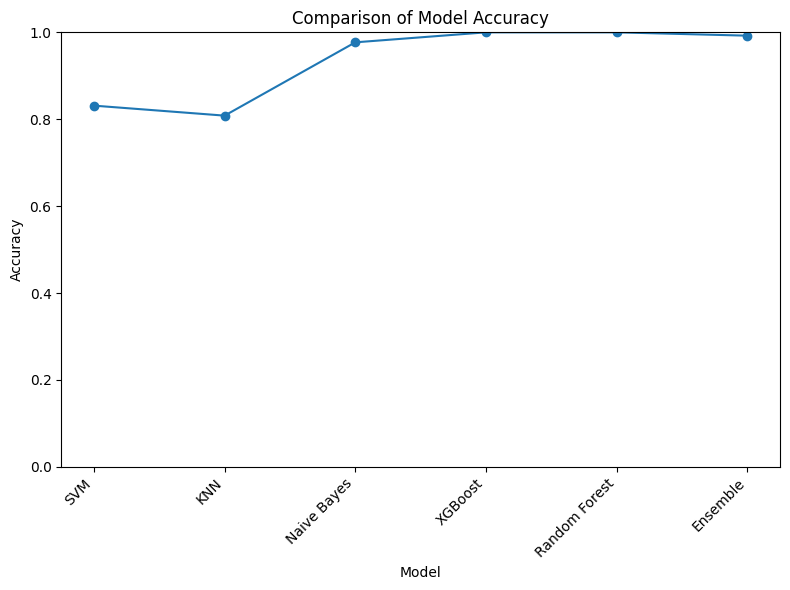

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Calculate classification reports for each model
reports = {
    "SVM": classification_report(val_gen.classes, svm_predictions, output_dict=True),
    "KNN": classification_report(val_gen.classes, knn_predictions, output_dict=True),
    "Naive Bayes": classification_report(val_gen.classes, nb_predictions, output_dict=True),
    "XGBoost": classification_report(val_gen.classes, xgb_predictions, output_dict=True),
    "Random Forest": classification_report(val_gen.classes, rf_predictions, output_dict=True),
    "Ensemble": classification_report(val_gen.classes, ensemble_predictions, output_dict=True)
}

# Extract accuracy for each model
accuracies = {model: report['accuracy'] for model, report in reports.items()}

# Create line plot for accuracy
plt.figure(figsize=(8, 6))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.title("Comparison of Model Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Set y-axis limit for accuracy
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


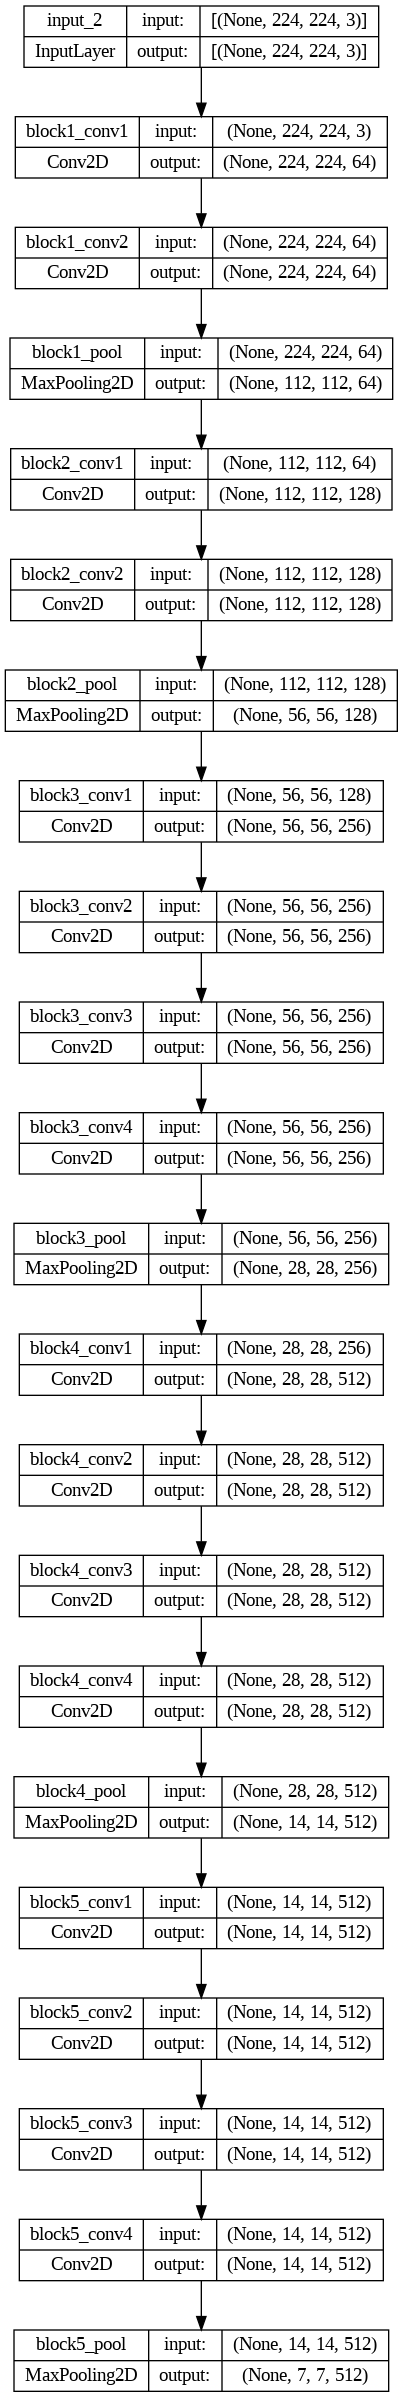

In [ ]:
from keras.applications import VGG19
from keras.utils.vis_utils import plot_model

# 1. Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Plot the architecture of the VGG19 model
plot_model(base_model, to_file='vgg19_architecture.png', show_shapes=True, show_layer_names=True)


1/1 [==============================] - 0s 166ms/step


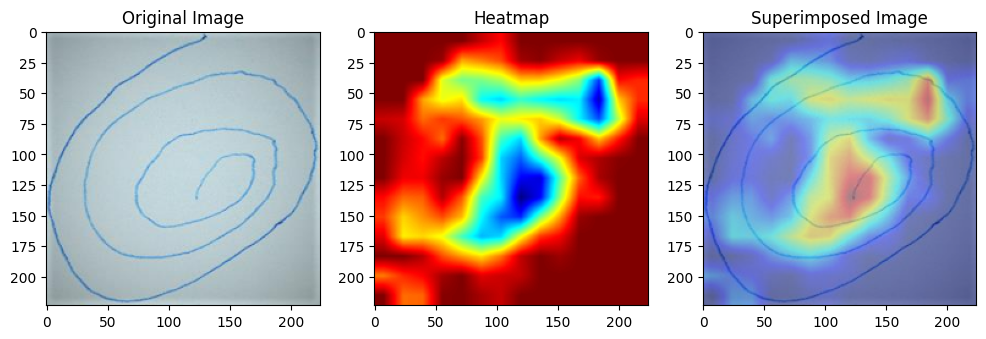

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.vgg19 import preprocess_input
from keras.models import Model

# 1. Load pre-trained VGG19 model without top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

# 3. Create the final model for Grad-CAM visualization
model = Model(inputs=base_model.input, outputs=output_layer)

# Load an example image for visualization
img_path = '/content/drive/MyDrive/Dataset/Parkinson/Parkinson1004.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img_original = img.copy()  # Simpan citra asli untuk ditampilkan nanti
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Get the predicted class index (0 or 1) for the input image
predicted_class = np.argmax(model.predict(img))

# Get the output feature map of the last convolutional layer
last_conv_layer = model.get_layer('block5_conv4')

# Calculate the gradients of the predicted class with respect to the output feature map
grad_model = Model(inputs=model.inputs, outputs=[model.output, last_conv_layer.output])
with tf.GradientTape() as tape:
    preds, last_conv_layer_output = grad_model(img)
    grads = tape.gradient(preds[:, predicted_class], last_conv_layer_output)

# Pool the gradients over all the axes except the channel axis
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each channel in the feature map array by its corresponding pooled gradient value
last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output.numpy()
for i in range(heatmap.shape[-1]):
    heatmap[:, :, i] *= pooled_grads[i]

# Generate the heatmap by averaging the weighted feature maps
heatmap = np.mean(heatmap, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Resize the heatmap to match the input image size
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[2]))

# Apply colormap to the heatmap
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = cv2.addWeighted(img_original, 0.6, heatmap, 0.4, 0)

# Display the original image, heatmap, and superimposed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(heatmap)
plt.title('Heatmap')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Superimposed Image')
plt.show()


Dengan penyorotan visual ini, kita dapat mendapatkan wawasan tentang bagaimana model melihat dan mengevaluasi gambar untuk mengenali tanda-tanda penyakit Parkinson, sehingga dapat membantu kita dalam interpretasi hasil klasifikasi dan mengidentifikasi faktor-faktor penting yang mempengaruhi hasil prediksi model.